Notebook for Standpoint Epistemology Project
--------------------------------------------

This notebook implements a premlinary "proof of concept" simulation showing that, in a collaborative causal theory formation task, if we assume that agents who measure statistically unusual parameters are able to make more accurate measurements of parameters, then building a group by recruiting agents with under-represented perspectives can be just as effective at reducing epistemic uncertainty as recruiting agents who sample statistically important parameters. 

We begin by creating a data-generating process via the following steps:

1. Randomly generate an n-by-n adjacency matrix $\mathbf{A}$ representing causal relationships between $n$ variables. If $A_{ij}=1$, then the value of the variable $j$ is determined by a function that takes as one of its arguments the value of the variable $i$.
2. For each $i,j$ such that $A_{ij}=1$, generate a coefficient $c_{ij}\sim\mathcal{N}(0,1)$.
3. For each $i,j$ such that $A_{ij}=1$, generate an exponent $\lambda_{ij}$ by randomly choosing a value in $\{-2,-1,1,2\}$.
4. Set an initial vector of values $\mathbf{x}_{0}\sim\mathcal{N}(0,1,n)$.
5. The system is then allowed to evolve via the following rule: for odd values of $q$, if there is at least one $j$ such that $A_{ij}=1$, then $x_{q}[l]=f(\sum_{i<l}A_{il}c_{il}x_{q-1}[l]^{\lambda_{il}})+\mathcal{N}(0,1)$ (where $f(x)=ln(x)$ if $x$ is positive and $f(x)=-ln(-x)$ if $x$ is negative), with $x_{q}[l]=x_{q-1}[l]$ otherwise. For even values of $q$, if there is at least one $j$ such that $A_{ij}=1$, then $x_{q}[l]=f(\sum_{i>l}A_{il}c_{il}x_{k-1}[l]^{\lambda_{il}})+\mathcal{N}(0,1)$, with $x_{q}[l]=x_{q-1}[l]$ otherwise. Here $\mathbf{x}[l]$ refers the the $l$-th entry of the vector $\mathbf{x}$.

Let $\mathbf{C}$ and $\mathbf{\Lambda}$ be matrices with values $c_{ij}$ and $\lambda_{ij}$, respectively. We are interested in estimating the probability distribution $p(\mathbf{X}_{6}|\mathbf{C},\mathbf{\Lambda},\mathbf{x}_{0})$, where $\mathbf{X}_{6}$ is the set of possible value vectors $\mathbf{x}_{6}$. That is, we want to know the distribution over the possible evolutions of the system over six steps. To estimate this distribution, we generate the matrices $\mathbf{A}$, $\mathbf{C}$, and $\mathbf{\lambda}$, which define the parameters of the system, and then evolve the system for six steps 100 times. From there, we obtain the empirical covariance matrix $\Sigma_{DGP}$ and empirical mean vector $\mu_{DGP}$, which together define the distribution $p(\mathbf{X}_{6}|\mathbf{C},\mathbf{\Lambda},\mathbf{x}_{0})$. 

Next, we simulate the process of collaborative causal theory formation via the following steps:

1. Generate N adjacency matrices $\mathbf{\hat{A}}^{1},\dots,\mathbf{\hat{A}}^{N}$ such that if $A_{ij}=1$, then for any $k$, $\hat{A}^{k}_{ij}\sim\text{Binom}(1,.8)$, with $\hat{A}^{k}_{ij}\sim\text{Binom}(1,.2)$ otherwise. Each of these represents an individual $k$'s theory of the causal structure of the system.
2. For each individual $k$, and pair of variables $i,j$, if $\hat{A}^{k}_{ij}=1$, then $\text{stpt}(i,j,k)$ is a function that returns the proportion of individuals in the group $\{1,\dots,N\}$ that also view the variable $j$ as causally effected by the variable $i$. The lower the value of $\text{stpt}(i,j,k)$, the more unique $k$'s standpoint is with respect to the relationship between $i$ and $j$.
3. For each $k$, if $\hat{A}^{k}_{ij}=1$, then sample a coefficient $\hat{c}^{k}_{ij}\sim\mathcal{N}(c_{ij},\text{stpt}(i,j,k))$. Thus, individuals with uncommon standpoints estimate the values of coefficients more accurately.
4. For each $k$, if $\hat{A}^{k}_{ij}=1$, then generate an exponent $\hat{\lambda}^{k}_{ij}=\lambda_{ij}$. (We thereby assume that individuals don't make errors about exponents when they measure a relationship.)
5. Each individual $k$ supposes that the system evolves according to the following rule: for odd values of $q$, if there is at least one $j$ such that $\hat{A}^{k}_{ij}=1$, then $x_{q}[l]=f(\sum_{i<l}\hat{A}^{k}_{il}\hat{c}^{k}_{il}x_{q-1}[l]^{\hat{\lambda}^{k}_{il}})+\mathcal{N}(0,1)$ with $x_{q}[l]=x_{q-1}[l]$ otherwise. For even values of $q$, if there is at least one $j$ such that $A_{ij}=1$, then $x_{q}[l]=f(\sum_{i>l}\hat{A}^{k}_{il}\hat{c}^{k}_{il}x_{q-1}[l]^{\hat{\lambda}^{k}_{il}})+\mathcal{N}(0,1)$, with $x_{q}[l]=x_{q-1}[l]$ otherwise.

Let $\mathcal{C}$ and $\mathcal{L}$ be sets of matrices $\{\mathbf{C}^{1},\dots,\mathbf{C}^{N}\}$ and $\{\mathbf{\Lambda}^{1},\dots,\mathbf{\Lambda}^{N}\}$, respectively, where each $\mathbf{C}^{k}$ and $\mathbf{\Lambda}^{k}$ represents individual $k$'s estimate of the coefficients and exponents that parameterize the system. We are interested in estimating the distribution $p(\mathbf{X}_{6}|\mathcal{C},\mathcal{L},\mathbf{x}_{0})$. To do this, for each individual, we generate 100 evolutions of the system according to their theory. For each evolution, we record the mean of all individuals' predicted evolution of the system. We then use these 100 mean vectors to obtain the empirical covariance matrix $\Sigma_{GRP}$ and empirical mean vector $\mu_{GRP}$ for the group's theory of the system, which define the distribution $p(\mathbf{X}_{6}|\mathcal{C},\mathcal{L},\mathbf{x}_{0})$.

We are ultimately interested in the Kullback-Leibler divergence of $p(\mathbf{X}_{6}|\mathcal{C},\mathcal{L},\mathbf{x}_{0})$ from $p(\mathbf{X}_{6}|\mathbf{C},\mathbf{\Lambda},\mathbf{x}_{0})$, which we take to be a measure of the epistemic uncertainty of the group. The lower this number, the less epistemic uncertainty is inherent in the group's process of collaborative causal theory formation. We can estimate this quantity using the empirical mean vectors and covariance matrixes obtained above, via the following equation:

$$D_{KL}(p(\mathbf{X}_{6}|\mathcal{C},\mathcal{L},\mathbf{x}_{0})||p(\mathbf{X}_{6}|\mathbf{C},\mathbf{\Lambda},\mathbf{x}_{0}))=\frac{1}{2}\Big(\ln\frac{|\Sigma_{GRP}|}{|\Sigma_{DGP}|} - n +\text{tr}(\Sigma_{DGP}^{-1}\Sigma_{GRP})+(\mu_{DGP}-\mu_{GRP})^{\text{T}}\Sigma_{DGP}^{-1}(\mu_{DGP}-\mu_{GRP})\Big).$$

Finally, we want to explore what happens to this divergence as we add members to the group. In general, we find that as the number of group members grows, epistemic uncertainty increases. However, we also compare epistemic uncertainty at different group sizes across two "recruitment strategies" for adding new members to the group. The first strategy involves recruiting new group members who sample statistically important parameters. We call this the "parameter importance strategy." We simulate this by generating new adjacency matrices $\mathbf{\hat{A}}^{k}$ by sampling as follows: if $A_{ij}=1$, then $\hat{A}^{k}_{ij}\sim\text{Binom}(1,\frac{|c_{ij}|}{\sum_{i,j}|c_{ij}|})$, with $\hat{A}^{k}_{ij}\sim\text{Binom}(1,.05)$ otherwise. This simulates a process whereby new group members are more likely to include in their own model of the system those causal connections that have high-magnitude coefficients. 

The second strategy involves recruiting members to the group who have relatively uncommon standpoints. We simulate this by sampling as follows: if $A_{ij}=1$, then $\hat{A}^{k}_{ij}\sim\text{Binom}(1,1-\text{stpt}(i,j,k))$, with $\hat{A}^{k}_{ij}\sim\text{Binom}(1,.05)$ otherwise. This simulates a process whereby new group members are more likely to include in their own model of the system those causal connections that exists, but are currently not represented by other members of the group. We call this the "standpoint diversity strategy."  

The following block of code implements these simulations for fifty different randomly constructed data-generating processes. 

In [4]:
def popularity(i,j,mats): #Define a popularity function that determines the proportion of individuals in a group that treat variabls i and j as causally related.
    count = 0
    for x in range(len(mats)):
        if mats[x][i][j] == 1:
            count = count+1
    return count/len(mats)

def standpoint(i,j,z,mats): #Define a standpoint function stpt(i,j,k) in terms of the population function.
    count = 0
    if mats[z][i][j] == 1:
        return popularity(i,j,mats)
    else:
        return 1

def func(x): #Define the function f
    if x>0:
        return np.log(x)
    if x<0:
        return -np.log(-x)
    
def func2(x,y): #Define the function used to calculate the evolution of the system.
    if x == 0:
        return y
    else:
        return func(x)+np.random.normal(0,1)
    
def kl_div(mu1,mu2,sig1,sig2,n): #Define the KL-divergence function.
    return .5*(np.log(np.linalg.det(np.matrix(sig2))/np.linalg.det(np.matrix(sig1)))-n+np.transpose(mu1-mu2)*np.linalg.inv(np.matrix(sig2))*(mu1-mu2)\
               +np.trace(np.linalg.inv(np.matrix(sig2))*np.matrix(sig1)))


Ns = [] #Create an empty list to store the number of individuals in the group for each simulation
KLs = [] #Create an empty list to store the KL-divergence on each simulation in which individuals are recruited using the parameter importance strategy.
standpoint_KLs = [] #Create an empty list to store the KL-divergence on each simulation in which individuals are recruited using the standpoint diversity strategy.

for q in tqdm(range(0,50)): #Cue the simulation to run fifty times.
    n=20 #Set the number of variables in the system.
    M=100 #Set the number of simulated outputs that we will obtain both for the data-generating process and for each individual in each group.
    dgp_matrix = [[random.choices([0,1],weights=[.5,.5],k=1)[0]  for i in range(n)] for j in range(n)] #Randomly generate the adjacency matrix for the data-generating process

    for i in range(n): 
        dgp_matrix[i][i] = 0 

    dgp_coefficients = np.random.normal(0,1,(20,20))#Randomly generate the coefficients for the data generating process. 
    for i in range(n):
        for j in range(n):
            if dgp_matrix[i][j] == 0:
                dgp_coefficients[i][j] = 0

    dgp_powers = np.random.choice([-2,-1,1,2],(20,20))#Randomly generate the exponents for the data-generating process.

    dgp_values = np.random.normal(0,1,n)#Randomly generate the initial state of the data-generating process. 

    dgp_sim_data = np.zeros((M,n))#Create an M-by-n array to store the simulated output of the data-generating process.

    for y in range(M):#Loop through six runs of the data-generating process 100 times, storing the state of the system after each six runs. 
        iterations = dgp_values
        for beta in range(3):
            for i in range(0,n):
                iterations[i]= func2(np.sum([dgp_matrix[i][j]*dgp_coefficients[i][j]*iterations[i]**dgp_powers[i][j] for j in range(n) if j<i])\
                                             ,dgp_values[i])
            for i in reversed(range(0,n-1)):
                iterations[i]= func2(np.sum([dgp_matrix[i][j]*dgp_coefficients[i][j]*iterations[i]**dgp_powers[i][j] for j in reversed(range(n)) if j>i])\
                                             ,dgp_values[i])

        dgp_sim_data[y] = iterations

    cov = np.cov(np.transpose(dgp_sim_data))#Obtain the empirical covariance matrix from the simulated data.
    mu = np.array([np.mean(dgp_sim_data[:,i]) for i in range(n)]).reshape(-1,1)#Obtain the mean vector for the simulated data. 
    N=10 #Set the initial number of individuals N in the group.
    adjacency_matrices = np.zeros((N,n,n)) #Create an N-by-n-by-n array store each individual's adjacency matrix.
    group_coefficients = np.zeros((N,n,n)) #Create an N-by-n-by-n array store each individual's coefficient matrix.
    group_sim_data = np.zeros((N,M,n)) #Create an N-by-M-by-n array to store the output of simulated predictions by the group.
    for z in range(N): #Loop through each individual in the group.
        indv_matrix = np.zeros((n,n)) #Create an n-by-n array to store the individual's adjacency matrix. 
        for i in range(n): #Generate the individual's agency matrix.
            for j in range(n):
                if dgp_matrix[i][j] == 0:
                    indv_matrix[i][j] = np.random.binomial(1,.2)
                if dgp_matrix[i][j] == 1:
                    indv_matrix[i][j] = np.random.binomial(1,.8)   
        adjacency_matrices[z] = indv_matrix #Add the inidividual's adjacency matrix to the array storing all such matrices.
        group_coefficients[z] = [[np.random.normal(dgp_coefficients[i][j],standpoint(i,j,z,adjacency_matrices)) for i in range(n)] for j in range(n)] #Generate the individual's coefficient matrix.
        indv_sim_data = np.zeros((M,n)) #Create an M-by-n array to store the simulated output of the individual's representation of the data-generating process.
        for y in range(M): #Loop through six runs of the data-generating process 100 times, storing the state of the system after each six runs. 
            iterations = dgp_values
            for beta in range(3):
                for i in range(0,n):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in range(n) if j<i])\
                                                 ,iterations[i])
                for i in reversed(range(0,n-1)):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in reversed(range(n)) if j>i])\
                                                 ,iterations[i])
            indv_sim_data[y] = iterations
        group_sim_data[z] = indv_sim_data #Add the output of each individual's simulations to the array storing all such outputs.
    aggregate_sim_data = np.zeros((M,n)) #Create an M-by-n array to store the mean output of the group's simulation for each six runs. 
    for i in range(M): #Obtain and store the mean output of the groups simulation for each six runs.
        for j in range(n):
            aggregate_sim_data[i][j] = np.mean([group_sim_data[z][i][j] for z in range(N)])
    Ns.append(N) #Add the number of individuals in the group to the list N.
    
    group_cov = np.cov(np.transpose(aggregate_sim_data))#Obtain the group's empirical covariance matrix.
    group_mu = np.array([np.mean(aggregate_sim_data[:,i]) for i in range(n)]).reshape(-1,1)#Obtain the group's mean vector.
    KLs.append(np.matrix.item(kl_div(group_mu,mu,group_cov,cov,n))) #Find the KL divergence between of group's distribution and the distribution of the data-generating process, and add it the list storing outcomes for both recruitment strategies. 
    standpoint_KLs.append(np.matrix.item(kl_div(group_mu,mu,group_cov,cov,n)))


    for N in range(11,100):#Loop through each individual being added to the group.
        indv_matrix = np.zeros((n,n)) #Generate an adjacency matrix using the parameter importance strategy.
        mag = np.sum([np.abs(dgp_coefficients[i][j]) for i in range(n) for j in range(n)])
        for i in range(n):
            for j in range(n):
                if dgp_matrix[i][j] == 0:
                    indv_matrix[i][j] = np.random.binomial(1,.05)
                if dgp_matrix[i][j] == 1:
                    indv_matrix[i][j] = np.random.binomial(1,np.abs(dgp_coefficients[i][j])/mag)
        adjacency_matrices = np.vstack((adjacency_matrices,indv_matrix.reshape(1,n,n)))
        group_coefficients = np.vstack((group_coefficients,\
                                        np.array([[np.random.normal(dgp_coefficients[i][j],standpoint(i,j,z,adjacency_matrices)) for i in range(n)] for j in range(n)]).reshape(1,n,n)))   
        for y in range(M): #Run 100 six-run simulations based on the new individual's representation of the data-generating process. 
            iterations = dgp_values
            for beta in range(3):
                for i in range(0,n):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in range(n) if j<i])\
                                                 ,iterations[i])
                for i in reversed(range(0,n-1)):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in reversed(range(n)) if j>i])\
                                                 ,iterations[i])
            indv_sim_data[y] = iterations
        group_sim_data = np.vstack((group_sim_data,indv_sim_data.reshape(1,M,n)))#Add the individual's simulated outputs to the outputs simualted by other members of the group.
        aggregate_sim_data = np.zeros((M,n))#Recalculate the mean output of the group for each run.
        for i in range(M):
            for j in range(n):
                aggregate_sim_data[i][j] = np.mean([group_sim_data[z][i][j] for z in range(N)])
        Ns.append(N)#Add the number of individuals in the group to the list.
        group_cov = np.cov(np.transpose(aggregate_sim_data))#Obtain the new group covariance matrix.
        group_mu = np.array([np.mean(aggregate_sim_data[:,i]) for i in range(n)]).reshape(-1,1)#Obtain the the new group mean vector.
        KLs.append(np.matrix.item(kl_div(group_mu,mu,group_cov,cov,n)))#Calculate the KL divergence of the group distribution from the individual distribution, and add it to the list.


    adjacency_matrices = np.delete(adjacency_matrices,range(10,99),0)#Clear everything generated when recruiting members under the parameter importance strategy.
    group_coefficients = np.delete(group_coefficients,range(10,99),0)
    group_sim_data = np.delete(group_sim_data,range(10,99),0)
    aggregate_sim_data = np.delete(aggregate_sim_data,range(10,100),0)

    for N in range(11,100):#Repeat the process above for the standpoint diversity strategy.
        indv_matrix = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if dgp_matrix[i][j] == 0:
                    indv_matrix[i][j] = np.random.binomial(1,.05)
                if dgp_matrix[i][j] == 1:
                    indv_matrix[i][j] = np.random.binomial(1,1-popularity(i,j,adjacency_matrices))
        adjacency_matrices = np.vstack((adjacency_matrices,indv_matrix.reshape(1,n,n)))
        group_coefficients = np.vstack((group_coefficients,\
                                        np.array([[np.random.normal(dgp_coefficients[i][j],standpoint(i,j,z,adjacency_matrices)) for i in range(n)] for j in range(n)]).reshape(1,n,n)))   
        for y in range(M):
            iterations = dgp_values
            for beta in range(3):
                for i in range(0,n):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in range(n) if j<i])\
                                                 ,iterations[i])
                for i in reversed(range(0,n-1)):
                    iterations[i] = func2(np.sum([adjacency_matrices[z][i][j]*group_coefficients[z][i][j]*iterations[i]**dgp_powers[i][j] for j in reversed(range(n)) if j>i])\
                                                 ,iterations[i])
            indv_sim_data[y] = iterations
        group_sim_data = np.vstack((group_sim_data,indv_sim_data.reshape(1,M,n)))
        aggregate_sim_data = np.zeros((M,n))
        for i in range(M):
            for j in range(n):
                aggregate_sim_data[i][j] = np.mean([group_sim_data[z][i][j] for z in range(N)])
        group_cov = np.cov(np.transpose(aggregate_sim_data))
        group_mu = np.array([np.mean(aggregate_sim_data[:,i]) for i in range(n)]).reshape(-1,1)
        standpoint_KLs.append(np.matrix.item(kl_div(group_mu,mu,group_cov,cov,n)))
        
a = np.hstack((np.array(Ns).reshape(-1,1), np.array(KLs).reshape(-1,1), np.array(standpoint_KLs).reshape(-1,1)))#Save all generated group sizes and divergences to a .csv.
np.savetxt("sim_data.csv", a, delimiter=",")

Having run the simulation, we now generate a scatter plot of the difference between the KL-divergence measuring epistemic uncertainty for all Ns under both strategies. Positive values indicate the diverse standpoints strategy outperforming the parameter importance strategies, whereas negative values indicate the parameter importance strategy outperforming the the diverse standpoints strategy.

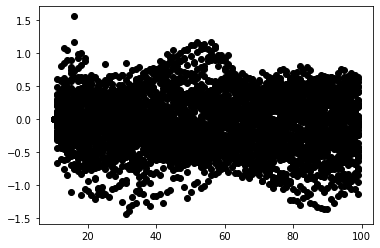

In [6]:
diffs = np.array(KLs) - np.array(standpoint_KLs)
plt.plot(np.array(Ns), diffs, 'o', color='black')

Clearly, there is not much of a trend here. Sometimes one strategy does better, sometimes another does. But I hope I've provided a functioning framework that could allows us to run further simulations interogating these strategies further. In particular, two questions stick out:

1. Is it possible to replace my representations of the DGP with a representation that is more common in the system dynamics literature (i.e., ODEs)?
2. Instead of randomly generating an adjacency matrix for the data-generating process, are there certain graph topologies that we want to prioritize?